# **HackBio Bioinformatics Internship - Drug Discovery**

In this Jupyter notebook, we will be building a real-life **data science project**
Particularly, we will be building a machine learning model  using the ChEMBL bioactivity data.

## **Section 1**
### **ChEMBL Database**

#### Install necessary libraries

In [ ]:
!pip install chembl-webresource-client
!pip install rdkit-pypi
!pip install mordred
!pip install pubchempy
#!pip install lazypredict
!pip install pycaret
!pip install lightgbm

### Import libraries

In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors


# Importing dataset


In [ ]:
import pandas as pd
df = pd.read_csv('/content/GDSC1_fitted_dose_response_27Oct23.csv')
df

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912
3,GDSC1,342,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.033564,0.950758,0.016290,-0.434437
4,GDSC1,342,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.966007,0.954778,0.180255,0.401702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333156,GDSC1,342,15911377,1659823,SNU-1040,SIDM00217,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,5.085294,0.972251,0.040661,0.860626
333157,GDSC1,342,15912122,1660035,SNU-61,SIDM00194,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,5.725399,0.976109,0.045453,1.785602
333158,GDSC1,342,15912431,1660036,SNU-81,SIDM00193,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,4.930753,0.970851,0.038612,0.637308
333159,GDSC1,342,15912739,1674021,SNU-C5,SIDM00498,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,4.551784,0.972330,0.042649,0.089683


## **Cleaning data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [ ]:
df2 = df[df.CELL_LINE_NAME.notna()]
df2 = df2[df.TCGA_DESC.notna()]
df2 = df2[df.DRUG_NAME.notna()]
df2 = df2[df.LN_IC50.notna()]
df2

<ipython-input-5-b498aafb9b21>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.DRUG_NAME.notna()]
<ipython-input-5-b498aafb9b21>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.LN_IC50.notna()]


,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912
3,GDSC1,342,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.033564,0.950758,0.016290,-0.434437
4,GDSC1,342,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.966007,0.954778,0.180255,0.401702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333156,GDSC1,342,15911377,1659823,SNU-1040,SIDM00217,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,5.085294,0.972251,0.040661,0.860626
333157,GDSC1,342,15912122,1660035,SNU-61,SIDM00194,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,5.725399,0.976109,0.045453,1.785602
333158,GDSC1,342,15912431,1660036,SNU-81,SIDM00193,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,4.930753,0.970851,0.038612,0.637308
333159,GDSC1,342,15912739,1674021,SNU-C5,SIDM00498,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,4.551784,0.972330,0.042649,0.089683


In [ ]:
value_count = df['CELL_LINE_NAME'].value_counts()
value_count

,count
CELL_LINE_NAME,
SK-MEL-2,402
TGW,400
MFM-223,400
SNU-C1,398
COLO-684,398
...,...
EW-12,41
ECC12,32
KP-N-RT-BM-1,25


In [ ]:
# Define the maximum number of occurrences allowed (e.g., 2 times)
n = 300

# Count the occurrences of each value in the column
value_counts = df2['CELL_LINE_NAME'].value_counts()

# Filter the DataFrame to keep only values that appear no more than 'n' times
df3 = df2[df2['CELL_LINE_NAME'].isin(value_counts[value_counts <= n].index)]

# Display the filtered DataFrame
df3

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
17,GDSC1,342,15596624,688010,NCI-H1963,SIDM00760,SCLC,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.762583,0.988447,0.060202,0.219288
20,GDSC1,342,15597920,688015,NCI-H2171,SIDM00733,SCLC,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.623065,0.991685,0.021532,0.094180
25,GDSC1,342,15599619,688026,NCI-H64,SIDM01126,SCLC,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.625623,0.994998,0.014885,0.096473
39,GDSC1,342,15613215,749713,HCC1599,SIDM00877,BRCA,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.789715,0.978027,0.034189,0.243617
69,GDSC1,342,15632614,753597,NCI-H128,SIDM00650,SCLC,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,4.670882,0.979820,0.031659,1.930496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333139,GDSC1,342,15906351,1503364,SK-GT-2,SIDM00393,STAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,4.757195,0.981976,0.057134,0.386510
333142,GDSC1,342,15907145,1503367,ESO51,SIDM00538,ESCA,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,5.420367,0.977101,0.072332,1.344820
333147,GDSC1,342,15908623,1509073,NCC010,SIDM00231,KIRC,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,4.617198,0.978494,0.095539,0.184209
333156,GDSC1,342,15911377,1659823,SNU-1040,SIDM00217,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,5.085294,0.972251,0.040661,0.860626


### Generating SMILES

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import MolToSmiles

### Function to get the SMILES string for each drug:

In [ ]:
import pubchempy as pcp

# Function to get SMILES from a drug name
def get_smiles(drug_name):
    try:
        compound = pcp.get_compounds(drug_name, 'name')
        return compound[0].isomeric_smiles if compound else None
    except:
        return None


In [ ]:
# Apply the SMILES conversion function to the 'drug_name' column
df3['SMILES'] = df3['DRUG_NAME'].apply(get_smiles)

# Display the DataFrame with the new 'SMILES' column
df3

<ipython-input-13-8c731fa0a0af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['SMILES'] = df3['DRUG_NAME'].apply(get_smiles)


,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE,SMILES
17,GDSC1,342,15596624,688010,NCI-H1963,SIDM00760,SCLC,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.762583,0.988447,0.060202,0.219288,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
20,GDSC1,342,15597920,688015,NCI-H2171,SIDM00733,SCLC,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.623065,0.991685,0.021532,0.094180,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
25,GDSC1,342,15599619,688026,NCI-H64,SIDM01126,SCLC,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.625623,0.994998,0.014885,0.096473,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
39,GDSC1,342,15613215,749713,HCC1599,SIDM00877,BRCA,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.789715,0.978027,0.034189,0.243617,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
69,GDSC1,342,15632614,753597,NCI-H128,SIDM00650,SCLC,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,4.670882,0.979820,0.031659,1.930496,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333139,GDSC1,342,15906351,1503364,SK-GT-2,SIDM00393,STAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,4.757195,0.981976,0.057134,0.386510,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...
333142,GDSC1,342,15907145,1503367,ESO51,SIDM00538,ESCA,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,5.420367,0.977101,0.072332,1.344820,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...
333147,GDSC1,342,15908623,1509073,NCC010,SIDM00231,KIRC,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,4.617198,0.978494,0.095539,0.184209,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...
333156,GDSC1,342,15911377,1659823,SNU-1040,SIDM00217,COREAD,1531,I-CBP112,"EP300, CBP",Chromatin histone acetylation,1005,Y,0.039063,10.0,5.085294,0.972251,0.040661,0.860626,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...


## **Data pre-processing of the bioactivity data**

#### **Combine the 4 columns into a DataFrame**

In [ ]:
#print the entire column title
columns_list = df3.columns.tolist()

print(columns_list)

['DATASET', 'NLME_RESULT_ID', 'NLME_CURVE_ID', 'COSMIC_ID', 'CELL_LINE_NAME', 'SANGER_MODEL_ID', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME', 'PUTATIVE_TARGET', 'PATHWAY_NAME', 'COMPANY_ID', 'WEBRELEASE', 'MIN_CONC', 'MAX_CONC', 'LN_IC50', 'AUC', 'RMSE', 'Z_SCORE', 'SMILES']


In [ ]:
selection =['CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_NAME', 'LN_IC50', 'SMILES']
df4 = df3[selection]
df4

,CELL_LINE_NAME,TCGA_DESC,DRUG_NAME,LN_IC50,SMILES
17,NCI-H1963,SCLC,Erlotinib,2.762583,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
20,NCI-H2171,SCLC,Erlotinib,2.623065,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
25,NCI-H64,SCLC,Erlotinib,2.625623,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
39,HCC1599,BRCA,Erlotinib,2.789715,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
69,NCI-H128,SCLC,Erlotinib,4.670882,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
...,...,...,...,...,...
333139,SK-GT-2,STAD,I-CBP112,4.757195,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...
333142,ESO51,ESCA,I-CBP112,5.420367,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...
333147,NCC010,KIRC,I-CBP112,4.617198,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...
333156,SNU-1040,COREAD,I-CBP112,5.085294,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...


In [ ]:
selection =['DRUG_NAME', 'LN_IC50', 'SMILES']
df5 = df3[selection]
df5

,DRUG_NAME,LN_IC50,SMILES
17,Erlotinib,2.762583,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
20,Erlotinib,2.623065,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
25,Erlotinib,2.625623,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
39,Erlotinib,2.789715,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
69,Erlotinib,4.670882,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
...,...,...,...
333139,I-CBP112,4.757195,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...
333142,I-CBP112,5.420367,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...
333147,I-CBP112,4.617198,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...
333156,I-CBP112,5.085294,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...


### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [ ]:
bioactivity_threshold = []
for i in df3.LN_IC50:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
df3.head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE,SMILES
17,GDSC1,342,15596624,688010,NCI-H1963,SIDM00760,SCLC,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.762583,0.988447,0.060202,0.219288,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
20,GDSC1,342,15597920,688015,NCI-H2171,SIDM00733,SCLC,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.623065,0.991685,0.021532,0.094180,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
25,GDSC1,342,15599619,688026,NCI-H64,SIDM01126,SCLC,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.625623,0.994998,0.014885,0.096473,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
39,GDSC1,342,15613215,749713,HCC1599,SIDM00877,BRCA,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.789715,0.978027,0.034189,0.243617,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
69,GDSC1,342,15632614,753597,NCI-H128,SIDM00650,SCLC,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,4.670882,0.979820,0.031659,1.930496,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...


In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df3 = pd.concat([df3, bioactivity_class], axis=1)
df3.head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,...,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE,SMILES,class
17,GDSC1,342.0,15596624.0,688010.0,NCI-H1963,SIDM00760,SCLC,1.0,Erlotinib,EGFR,...,1045.0,Y,0.007813,2.0,2.762583,0.988447,0.060202,0.219288,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,active
20,GDSC1,342.0,15597920.0,688015.0,NCI-H2171,SIDM00733,SCLC,1.0,Erlotinib,EGFR,...,1045.0,Y,0.007813,2.0,2.623065,0.991685,0.021532,0.094180,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,active
25,GDSC1,342.0,15599619.0,688026.0,NCI-H64,SIDM01126,SCLC,1.0,Erlotinib,EGFR,...,1045.0,Y,0.007813,2.0,2.625623,0.994998,0.014885,0.096473,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,active
39,GDSC1,342.0,15613215.0,749713.0,HCC1599,SIDM00877,BRCA,1.0,Erlotinib,EGFR,...,1045.0,Y,0.007813,2.0,2.789715,0.978027,0.034189,0.243617,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,active
69,GDSC1,342.0,15632614.0,753597.0,NCI-H128,SIDM00650,SCLC,1.0,Erlotinib,EGFR,...,1045.0,Y,0.007813,2.0,4.670882,0.979820,0.031659,1.930496,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,active


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import numpy as np

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
# Example usage (assuming df4 is your DataFrame)
df_lipinski = lipinski(df5.SMILES)

In [ ]:
df_lipinski
# df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,393.443,3.4051,1.0,7.0
1,393.443,3.4051,1.0,7.0
2,393.443,3.4051,1.0,7.0
3,393.443,3.4051,1.0,7.0
4,393.443,3.4051,1.0,7.0
...,...,...,...,...
15681,468.594,4.2224,0.0,6.0
15682,468.594,4.2224,0.0,6.0
15683,468.594,4.2224,0.0,6.0
15684,468.594,4.2224,0.0,6.0


In [ ]:
df5

,DRUG_NAME,LN_IC50,SMILES
17,Erlotinib,2.762583,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
20,Erlotinib,2.623065,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
25,Erlotinib,2.625623,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
39,Erlotinib,2.789715,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
69,Erlotinib,4.670882,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
...,...,...,...
333139,I-CBP112,4.757195,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...
333142,I-CBP112,5.420367,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...
333147,I-CBP112,4.617198,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...
333156,I-CBP112,5.085294,CCC(=O)N1CCOC2=C(C1)C=C(C=C2OC[C@H]3CCCN(C3)C)...


In [ ]:
df_combined = pd.concat([df5,df_lipinski], axis=1)

In [ ]:
df_combined

,DRUG_NAME,LN_IC50,SMILES,MW,LogP,NumHDonors,NumHAcceptors
17,Erlotinib,2.762583,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,393.443,3.40510,1.0,7.0
20,Erlotinib,2.623065,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,393.443,3.40510,1.0,7.0
25,Erlotinib,2.625623,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,393.443,3.40510,1.0,7.0
39,Erlotinib,2.789715,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,914.187,6.18060,3.0,13.0
69,Erlotinib,4.670882,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,398.482,3.33494,3.0,3.0
...,...,...,...,...,...,...,...
15681,NaN,NaN,NaN,468.594,4.22240,0.0,6.0
15682,NaN,NaN,NaN,468.594,4.22240,0.0,6.0
15683,NaN,NaN,NaN,468.594,4.22240,0.0,6.0
15684,NaN,NaN,NaN,468.594,4.22240,0.0,6.0


In [ ]:
df_combined.LN_IC50.describe()

,LN_IC50
count,19846.000000
mean,1.889213
std,2.590336
min,-9.989032
25%,0.476135
50%,2.326808
75%,3.740369
max,11.325358


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

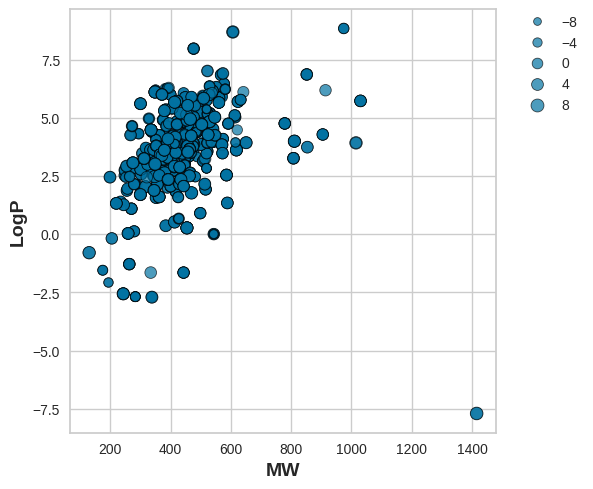

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_combined, size='LN_IC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')

In [ ]:
# There might be one or more valid SMILES that can represent one compound
# Thanks to Pat Walters for this information,checkout his excellent blog: https://www.blogger.com/profile/18223198920629617711
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

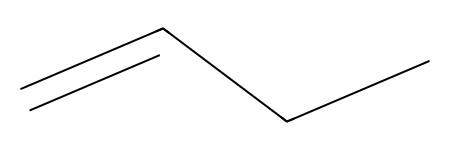

In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Chem.MolFromSmiles('C=CCC')

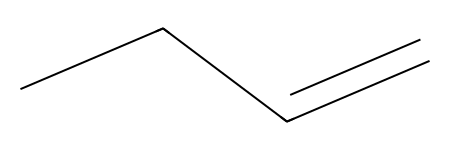

In [ ]:
Chem.MolFromSmiles('CCC=C')

## Calculate descriptors using RDkit

### a. General molecular descriptors-about 200 molecular descriptors

In [ ]:
#remove NaN
df_cleaned = df_combined.dropna()

df_cleaned

,DRUG_NAME,LN_IC50,SMILES,MW,LogP,NumHDonors,NumHAcceptors
17,Erlotinib,2.762583,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,393.443,3.40510,1.0,7.0
20,Erlotinib,2.623065,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,393.443,3.40510,1.0,7.0
25,Erlotinib,2.625623,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,393.443,3.40510,1.0,7.0
39,Erlotinib,2.789715,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,914.187,6.18060,3.0,13.0
69,Erlotinib,4.670882,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,398.482,3.33494,3.0,3.0
...,...,...,...,...,...,...,...
15642,Lapatinib,3.507638,CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3...,468.594,4.22240,0.0,6.0
15644,Lapatinib,3.272498,CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3...,468.594,4.22240,0.0,6.0
15662,Lapatinib,2.189684,CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3...,468.594,4.22240,0.0,6.0
15665,Lapatinib,2.582596,CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3...,468.594,4.22240,0.0,6.0


In [ ]:
#subset the IC50
LN_IC = df_cleaned[("LN_IC50")]
df_cleaned['LN_IC50'].describe()

,LN_IC50
count,1148.000000
mean,1.561080
std,2.530787
min,-7.274254
25%,0.251047
50%,2.157557
75%,3.304679
max,7.185238


In [ ]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

In [ ]:
# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df_cleaned["SMILES"])

In [ ]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.882384,-4.037710,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150,0,...,0,0,0,1,0,0,0,0,0,0
1,8.882384,-4.037710,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150,0,...,0,0,0,1,0,0,0,0,0,0
2,8.882384,-4.037710,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150,0,...,0,0,0,1,0,0,0,0,0,0
3,8.882384,-4.037710,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150,0,...,0,0,0,1,0,0,0,0,0,0
4,8.882384,-4.037710,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,14.568457,-6.182382,14.568457,0.003500,0.179479,581.069,554.861,580.134732,206,0,...,0,0,1,0,0,0,0,0,0,0
1144,14.568457,-6.182382,14.568457,0.003500,0.179479,581.069,554.861,580.134732,206,0,...,0,0,1,0,0,0,0,0,0,0
1145,14.568457,-6.182382,14.568457,0.003500,0.179479,581.069,554.861,580.134732,206,0,...,0,0,1,0,0,0,0,0,0,0
1146,14.568457,-6.182382,14.568457,0.003500,0.179479,581.069,554.861,580.134732,206,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
fp_pIC = pd.concat([df_with_200_descriptors, df_lipinski, LN_IC], axis=1)

fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,MW,LogP,NumHDonors,NumHAcceptors,LN_IC50
0,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,393.443,3.4051,1.0,7.0,NaN
1,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,393.443,3.4051,1.0,7.0,NaN
2,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,393.443,3.4051,1.0,7.0,NaN
3,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,393.443,3.4051,1.0,7.0,NaN
4,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,393.443,3.4051,1.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,468.594,4.2224,0.0,6.0,NaN
15682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,468.594,4.2224,0.0,6.0,NaN
15683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,468.594,4.2224,0.0,6.0,NaN
15684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,468.594,4.2224,0.0,6.0,NaN


In [ ]:
# the Molecular is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), you can drop one
fp_pIC = fp_pIC.drop('MW', axis=1)

In [ ]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,LN_IC50
0,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.4051,1.0,7.0,NaN
1,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.4051,1.0,7.0,NaN
2,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.4051,1.0,7.0,NaN
3,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.4051,1.0,7.0,NaN
4,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.4051,1.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.2224,0.0,6.0,NaN
15682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.2224,0.0,6.0,NaN
15683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.2224,0.0,6.0,NaN
15684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.2224,0.0,6.0,NaN


In [ ]:
# Check for duplicate column names
duplicate_columns = fp_pIC.columns[fp_pIC.columns.duplicated()]

# Print the duplicate column names
print(f"Duplicate columns: {duplicate_columns}")

# Drop duplicate columns (keep first instance)
fp_pIC = fp_pIC.loc[:, ~fp_pIC.columns.duplicated()]

fp_pIC

Duplicate columns: Index([], dtype='object')


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,LN_IC50
0,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4051,NaN
1,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4051,NaN
2,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4051,NaN
3,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4051,NaN
4,8.882384,-4.03771,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4051,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2224,NaN
15682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2224,NaN
15683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2224,NaN
15684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2224,NaN


In [ ]:
# Remove rows where 'col1' has NaN values
fp_pIC = fp_pIC.dropna(subset=['LN_IC50'])

fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,LN_IC50
17,8.882384,-4.037710,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.40510,2.762583
20,8.882384,-4.037710,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.40510,2.623065
25,8.882384,-4.037710,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.40510,2.625623
39,16.629391,-7.675282,16.629391,2.610034,0.155511,914.187,834.555,913.555142,366.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.18060,2.789715
69,14.823493,-4.799353,14.823493,0.204620,0.626303,398.482,371.266,398.211804,154.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33494,4.670882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.22240,3.507638
15644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.22240,3.272498
15662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.22240,2.189684
15665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.22240,2.582596


# Model Evaluation

### Using pycaret

In [ ]:
from pycaret.regression import setup, compare_models, tune_model, finalize_model, save_model

# Initialize PyCaret for regression
reg = setup(data=fp_pIC, target='LN_IC50')

# Compare different models and get the best one
best_model = compare_models()



,Description,Value
0,Session id,7690
1,Target,LN_IC50
2,Target type,Regression
3,Original data shape,"(1148, 210)"
4,Transformed data shape,"(1148, 210)"
5,Transformed train set shape,"(803, 210)"
6,Transformed test set shape,"(345, 210)"
7,Numeric features,209
8,Rows with missing values,92.5%
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.7500,5.1052,2.2507,0.1659,0.6084,1.6139,0.6750
dummy,Dummy Regressor,1.9661,6.2276,2.4859,-0.0105,0.5040,1.5405,0.0590
knn,K Neighbors Regressor,2.2880,7.1571,2.6708,-0.1752,0.8472,1.0987,0.0860
lr,Linear Regression,22700047628.3706,417386651415278438580224.0000,204300428639.9127,-85298731988404475527168.0000,0.7820,8137048842.0534,0.8020
br,Bayesian Ridge,25311691512.3682,518952198964136588083200.0000,227805223595.6310,-106055055628007276281856.0000,0.8172,9073217531.5106,0.0960
llar,Lasso Least Angle Regression,30630621624.7337,759970334607570498486272.0000,275675594607.1520,-155310443376714878812160.0000,0.7882,10979838822.2225,0.1290
lasso,Lasso Regression,30630621624.7337,759970334607571303792640.0000,275675594607.1521,-155310443376715013029888.0000,0.7882,10979838822.2225,0.1520
omp,Orthogonal Matching Pursuit,31972736310.3220,828027252305223588249600.0000,287754626777.4477,-169218815297486166425600.0000,0.7898,11460932647.4835,0.0820
en,Elastic Net,44263438548.6675,1586994113501533915054080.0000,398370946922.5420,-324324185011029601681408.0000,0.7915,15866652232.0118,0.2010
ridge,Ridge Regression,155798566152.9035,19661286503892517660917760.0000,1402187095360.6333,-4018055686151184230383616.0000,0.8118,55847483800.6566,0.0700


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Tune the best model
tuned_model = tune_model(best_model)

# Print the results
print(tuned_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6388,5.0702,2.2517,0.1333,0.5857,1.0946
1,1.6412,4.2704,2.0665,0.1273,0.5847,1.5135
2,1.5609,4.1089,2.0270,0.2267,0.5294,0.6903
3,1.6291,4.1310,2.0325,0.2564,0.4869,0.8899
4,1.9829,6.9498,2.6362,0.0065,0.6419,2.0697
5,1.8317,5.9328,2.4357,-0.0263,0.6512,1.1718
6,1.9179,5.8855,2.4260,0.2623,0.6506,0.8925
7,1.6199,4.4088,2.0997,0.2240,0.6512,4.1984
8,1.9826,6.4174,2.5333,0.2283,0.6202,1.4239


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
LGBMRegressor(n_jobs=-1, random_state=7690)


In [ ]:
# Finalize the model
final_model = finalize_model(best_model)

# Save the model
save_model(final_model, 'best_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MaxEStateIndex', 'MinEStateIndex',
                                              'MaxAbsEStateIndex',
                                              'MinAbsEStateIndex', 'qed',
                                              'MolWt', 'HeavyAtomMolWt',
                                              'ExactMolWt',
                                              'NumValenceElectrons',
                                              'NumRadicalElectrons',
                                              'MaxPartialCharge',
                                              'MinPartialCharge',
                                              'MaxAbsPartialCharge',
                                              'MinAbsPartialCharge',
                                              'FpDensityMo...
                                              'BCUT2D_MWLOW', 'BCUT2D_CHGHI',
                 

 ### Train and Split data, select regression model  and train model

In [ ]:
# Step 1: Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pandas as pd
import lightgbm as lgb


In [ ]:

X = fp_pIC.drop(columns=['LN_IC50'])
y = fp_pIC['LN_IC50']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(fp_pIC['LN_IC50'].max())

7.185238


## Prediction Models

### Predicting the IC50 of the entire dataset

In [ ]:
# Create a LightGBM regressor model
lgbm_model = lgb.LGBMRegressor()

# Train the model on the entire dataset
lgbm_model.fit(X, y)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2544
[LightGBM] [Info] Number of data points in the train set: 1148, number of used features: 209
[LightGBM] [Info] Start training from score 1.561080


LGBMRegressor()

In [ ]:
# Predict IC50 for the entire dataset
y_pred_all = lgbm_model.predict(X)

# Print the predictions
print(y_pred_all)


[2.70901217 2.70901217 2.70901217 ... 2.82923509 2.82923509 2.82923509]


In [ ]:
# Add predicted IC50 values as a new column in the DataFrame
fp_pIC['Predicted_IC50'] = y_pred_all

# Display the updated DataFrame
fp_pIC


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,LN_IC50,Predicted_IC50
17,8.882384,-4.037710,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.40510,2.762583,2.709012
20,8.882384,-4.037710,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.40510,2.623065,2.709012
25,8.882384,-4.037710,8.882384,0.050438,0.417884,393.443,370.259,393.168856,150.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.40510,2.625623,2.709012
39,16.629391,-7.675282,16.629391,2.610034,0.155511,914.187,834.555,913.555142,366.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.18060,2.789715,1.420059
69,14.823493,-4.799353,14.823493,0.204620,0.626303,398.482,371.266,398.211804,154.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33494,4.670882,3.986054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.22240,3.507638,2.829235
15644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.22240,3.272498,2.829235
15662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.22240,2.189684,2.829235
15665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.22240,2.582596,2.829235


### Evaluate the Model on the Entire Dataset

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# R2 Score for the entire dataset
r2_all = r2_score(y, y_pred_all)

# Mean Absolute Error (MAE) for the entire dataset
mae_all = mean_absolute_error(y, y_pred_all)

# Root Mean Squared Error (RMSE) for the entire dataset
rmse_all = np.sqrt(mean_squared_error(y, y_pred_all))

# Print the evaluation results
print(f"R2 Score (entire dataset): {r2_all}")
print(f"Mean Absolute Error (MAE) (entire dataset): {mae_all}")
print(f"Root Mean Squared Error (RMSE) (entire dataset): {rmse_all}")


R2 Score (entire dataset): 0.4683151622241586
Mean Absolute Error (MAE) (entire dataset): 1.4020038316778054
Root Mean Squared Error (RMSE) (entire dataset): 1.8445630519833385


## Plot scatterplot

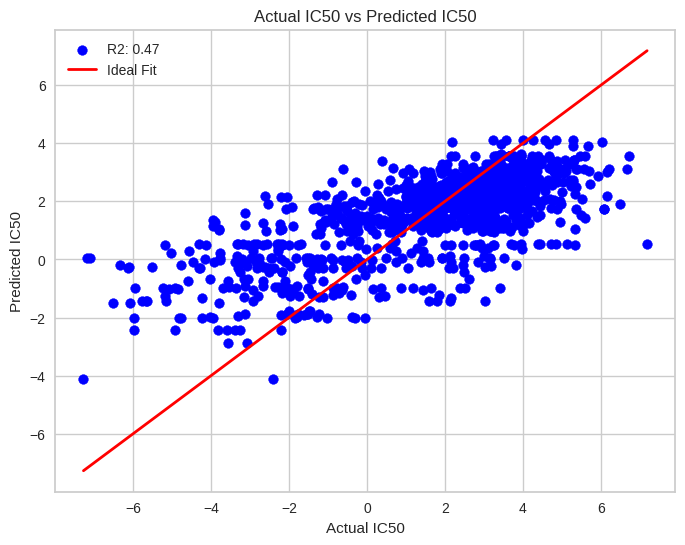

0.4683151622241586

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# Assuming y contains actual IC50 values and y_pred_all contains predicted IC50 values
# Here I'm creating some dummy data for illustration purposes. In practice, use your actual data.
y_actual = fp_pIC['LN_IC50']
y_pred = fp_pIC['Predicted_IC50']


# Calculate the correlation coefficient (R2)
r2 = r2_score(y_actual, y_pred)

# Scatter plot of Actual IC50 vs Predicted IC50
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, color='blue', label=f'R2: {r2:.2f}')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', lw=2, label='Ideal Fit')
plt.title("Actual IC50 vs Predicted IC50")
plt.xlabel("Actual IC50")
plt.ylabel("Predicted IC50")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Output the correlation coefficient
r2
